In [2]:
import plotly.express as px

In [3]:
import pandas as pd

In [6]:
pd.set_option('display.max_columns', None)

In [19]:
all_df = pd.read_csv('all_annotation.txt', sep='\t')

C:\Users\terca\AppData\Local\Temp\ipykernel_6900\3083266107.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df = pd.read_csv('all_annotation.txt', sep='\t')


In [20]:
all_df.columns

Index(['id', 'architecture_pfam', 'architecture_l_pfam', 'PF06330.14',
       'PF01397.24', 'PF03936.19', 'PF00494.22', 'PF13249.9', 'PF19086.3',
       'PF13243.9', 'architecture_supfam', 'architecture_l_supfam', '0041184',
       '0053354', '0053355', '0048261', '0048806', '0046340', '0047573',
       'record_id', 'record_description', 'new_id', 'organism', 'tax_id',
       'lineage', 'superkingdom', 'kingdom', 'phylum'],
      dtype='object')

In [25]:
df_lengths = pd.read_csv('all_filtered_5_unique_no_stop_lengths.csv')

In [28]:
final_ids = df_lengths['id'].tolist()

In [33]:
all_df = all_df[all_df['id'].isin(final_ids)]

In [21]:
all_df['kingdom'] = all_df['kingdom'].fillna('unknown')

In [22]:
all_df['kingdom'] = all_df['kingdom'].apply(lambda x: 'Environmental' if x=='environmental' else x)

In [35]:
superkingdom_color_map = {'Metagenome': '#BF8F6B', 
                          'Eukaryota': '#FF9536',
                          'Bacteria':'#995FBC',
                          'Archaea':'#2E2D97',
                          'Viruses':'#D2EDE0',
                          'unknown':'#C3CAD7',
                          'undef':'#C3CAD7'
                         }

In [37]:
eukaryota_color_map = {'Fungi':'#FF9481', 
                       'Viridiplantae': '#BEDF7C', 
                       'Metazoa':'#94CCFC',
                       'unknown':'#FF9536'
}

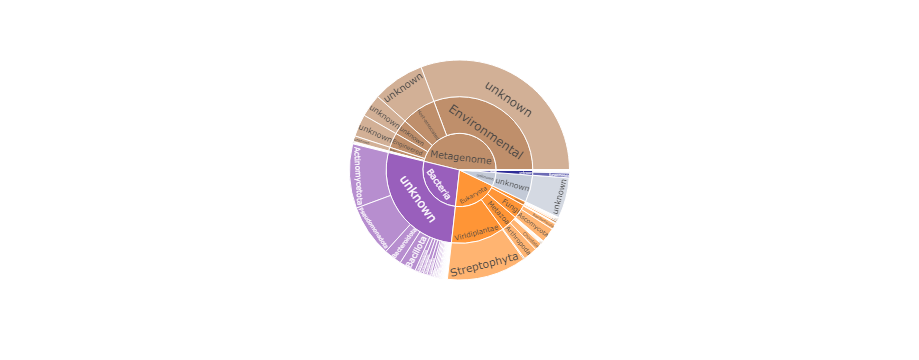

In [20]:
fig = px.sunburst(all_df, path=['superkingdom', 'kingdom', 'phylum'],
                  color='superkingdom', color_discrete_map=superkingdom_color_map)
fig.show()

In [38]:
fig = px.sunburst(all_df, path=['superkingdom', 'kingdom', 'phylum'],
                  color='superkingdom', color_discrete_map=superkingdom_color_map)
fig.write_image("sunburst_plot_updated.png")

# Export as SVG
fig.write_image("sunburst_plot_updated.svg")

In [39]:
euk_df = all_df[all_df['superkingdom']=='Eukaryota']

In [40]:
import ast

In [42]:
euk_df['lineage_l'] = euk_df['lineage'].apply(lambda x: ast.literal_eval(x) if x != 'error' else {})

C:\Users\terca\AppData\Local\Temp\ipykernel_6900\4290802338.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
euk_df['species'] = euk_df['lineage_l'].apply(lambda x: x.get('family','unknown'))
euk_df['genus'] = euk_df['lineage_l'].apply(lambda x: x.get('genus', 'unknown'))
euk_df['family'] = euk_df['lineage_l'].apply(lambda x: x.get('family', 'unknown'))
euk_df['order'] = euk_df['lineage_l'].apply(lambda x: x.get('order','unknown'))
euk_df['class'] = euk_df['lineage_l'].apply(lambda x: x.get('class', 'unknown'))

C:\Users\terca\AppData\Local\Temp\ipykernel_6900\533591319.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\terca\AppData\Local\Temp\ipykernel_6900\533591319.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\terca\AppData\Local\Temp\ipykernel_6900\533591319.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [44]:
euk_df

,id,architecture_pfam,architecture_l_pfam,PF06330.14,PF01397.24,PF03936.19,PF00494.22,PF13249.9,PF19086.3,PF13243.9,...,lineage,superkingdom,kingdom,phylum,lineage_l,species,genus,family,order,class
156,bfd_051353,['PF00494.22'],['PF00494.22'],0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"{'species': 'Ancylostoma ceylanicum', 'genus':...",Eukaryota,Metazoa,Nematoda,"{'species': 'Ancylostoma ceylanicum', 'genus':...",Ancylostomatidae,Ancylostoma,Ancylostomatidae,Strongylida,Chromadorea
371,bfd_134078,['PF00494.22'],['PF00494.22'],0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,"{'species': 'Acytostelium subglobosum', 'genus...",Eukaryota,unknown,Evosea,"{'species': 'Acytostelium subglobosum', 'genus...",Acytosteliaceae,Acytostelium,Acytosteliaceae,Acytosteliales,Eumycetozoa
385,bfd_082404,['PF19086.3_partial'],['PF19086.3_partial'],0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,"{'species': 'Sclerotinia borealis', 'genus': '...",Eukaryota,Fungi,Ascomycota,"{'species': 'Sclerotinia borealis', 'genus': '...",Sclerotiniaceae,Sclerotinia,Sclerotiniaceae,Helotiales,Leotiomycetes
411,bfd_019468,['PF19086.3'],['PF19086.3'],0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"{'species': 'Pseudocercospora musae', 'genus':...",Eukaryota,Fungi,Ascomycota,"{'species': 'Pseudocercospora musae', 'genus':...",Mycosphaerellaceae,Pseudocercospora,Mycosphaerellaceae,Mycosphaerellales,Dothideomycetes
521,bfd_008333,['PF06330.14'],['PF06330.14'],1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"{'species': 'Daedalea quercina', 'genus': 'Dae...",Eukaryota,Fungi,Basidiomycota,"{'species': 'Daedalea quercina', 'genus': 'Dae...",Fomitopsidaceae,Daedalea,Fomitopsidaceae,Polyporales,Agaricomycetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682435,uniprot_253646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'species': 'Lolium rigidum', 'genus': 'Lolium...",Eukaryota,Viridiplantae,Streptophyta,"{'species': 'Lolium rigidum', 'genus': 'Lolium...",Poaceae,Lolium,Poaceae,Poales,Magnoliopsida
682444,uniprot_218100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'species': 'Azadinium spinosum', 'genus': 'Az...",Eukaryota,unknown,unknown,"{'species': 'Azadinium spinosum', 'genus': 'Az...",Amphidomataceae,Azadinium,Amphidomataceae,Gonyaulacales,Dinophyceae
682453,uniprot_257655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'species': 'Dermatophagoides farinae', 'genus...",Eukaryota,Metazoa,Arthropoda,"{'species': 'Dermatophagoides farinae', 'genus...",Pyroglyphidae,Dermatophagoides,Pyroglyphidae,Sarcoptiformes,Arachnida
682458,uniprot_137796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'species': 'Fragilariopsis cylindrus', 'genus...",Eukaryota,unknown,Bacillariophyta,"{'species': 'Fragilariopsis cylindrus', 'genus...",Bacillariaceae,Fragilariopsis,Bacillariaceae,Bacillariales,Bacillariophyceae


In [45]:
eukaryota_color_map = {'Fungi':'#FF9481', 
                       'Viridiplantae': '#BEDF7C', 
                       'Metazoa':'#94CCFC',
                       'unknown':'#FF9536'
}

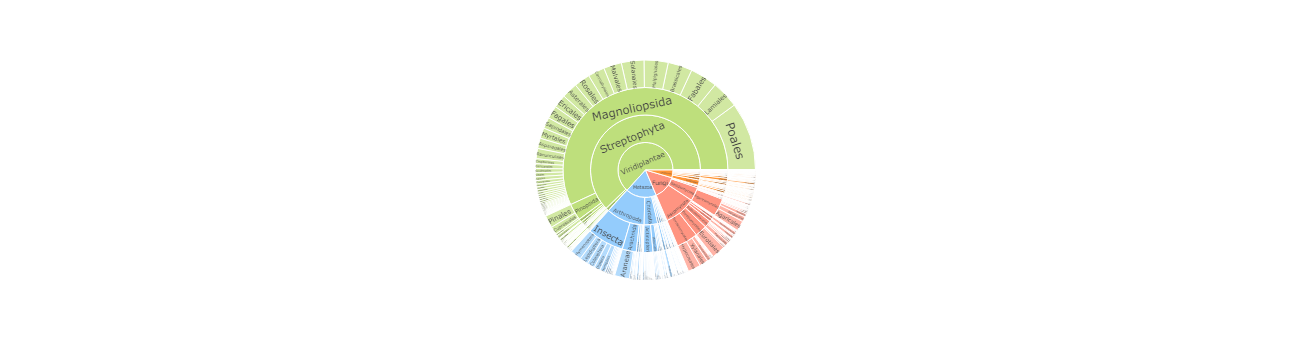

In [47]:
#fig = px.sunburst(euk_df, path=['superkingdom','kingdom', 'phylum','class','order','family','genus','species'])
fig = px.sunburst(euk_df, path=['kingdom', 'phylum','class','order'],  color='kingdom', color_discrete_map=eukaryota_color_map)
fig.show()

In [48]:
fig = px.sunburst(euk_df, path=['kingdom', 'phylum','class','order'],  color='kingdom', color_discrete_map=eukaryota_color_map)
fig.write_image("sunburst_plot_eukaryotes_updated.svg")


# New taxa

In [16]:
anno_df = pd.read_csv('novelty_score/all_annotation_with_tax_score.csv', index_col=0)

C:\Users\terca\AppData\Local\Temp\ipykernel_6900\1386015551.py:1: DtypeWarning: Columns (8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  anno_df = pd.read_csv('novelty_score/all_annotation_with_tax_score.csv', index_col=0)


In [52]:
anno_df = anno_df[anno_df['id'].isin(final_ids)]

In [66]:
euk_df[['id','superkingdom', 'kingdom', 'phylum','class','order','family','genus','species']]

,id,superkingdom,kingdom,phylum,class,order,family,genus,species
156,bfd_051353,Eukaryota,Metazoa,Nematoda,Chromadorea,Strongylida,Ancylostomatidae,Ancylostoma,Ancylostomatidae
371,bfd_134078,Eukaryota,unknown,Evosea,Eumycetozoa,Acytosteliales,Acytosteliaceae,Acytostelium,Acytosteliaceae
385,bfd_082404,Eukaryota,Fungi,Ascomycota,Leotiomycetes,Helotiales,Sclerotiniaceae,Sclerotinia,Sclerotiniaceae
411,bfd_019468,Eukaryota,Fungi,Ascomycota,Dothideomycetes,Mycosphaerellales,Mycosphaerellaceae,Pseudocercospora,Mycosphaerellaceae
521,bfd_008333,Eukaryota,Fungi,Basidiomycota,Agaricomycetes,Polyporales,Fomitopsidaceae,Daedalea,Fomitopsidaceae
...,...,...,...,...,...,...,...,...,...
682435,uniprot_253646,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Poales,Poaceae,Lolium,Poaceae
682444,uniprot_218100,Eukaryota,unknown,unknown,Dinophyceae,Gonyaulacales,Amphidomataceae,Azadinium,Amphidomataceae
682453,uniprot_257655,Eukaryota,Metazoa,Arthropoda,Arachnida,Sarcoptiformes,Pyroglyphidae,Dermatophagoides,Pyroglyphidae
682458,uniprot_137796,Eukaryota,unknown,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Fragilariopsis,Bacillariaceae


In [72]:
euk_df2 = euk_df[['id','superkingdom', 'kingdom', 'phylum','class','order','family','genus','species']].merge(anno_df[['id','unchar_phylum', 'unchar_class', 'unchar_order','unchar_family', 'unchar_genus', 'unchar_species']], how='left', on='id')

# New eukaryotic phyla which contain TPSs

**Top 10 by count**

In [76]:
euk_df2[euk_df2['unchar_phylum']==True]['phylum'].value_counts().head(10)

phylum
Bacillariophyta    894
Nematoda           675
Mollusca           675
Haptophyta         650
Mucoromycota       547
Platyhelminthes    317
Rotifera           303
Oomycota           206
Echinodermata      200
Euglenozoa         189
Name: count, dtype: int64

# New eukaryotic classes which contain TPSs (from characterized phyla)

In [86]:
euk_df2[(euk_df2['unchar_phylum']==False)&(euk_df2['unchar_class']==True)]['phylum'].value_counts()

phylum
Arthropoda       4662
Chordata         3249
Chlorophyta       859
Basidiomycota     438
Streptophyta      434
Ascomycota        344
Cnidaria          156
Rhodophyta         68
Porifera           15
Evosea              9
Name: count, dtype: int64

In [81]:
euk_df2[(euk_df2['unchar_phylum']==False)&(euk_df2['unchar_class']==True)]['class'].value_counts().head(10)

class
Arachnida        3099
Actinopteri      2105
Malacostraca      551
Hexanauplia       432
Chlorophyceae     403
Aves              374
Amphibia          362
Lepidosauria      246
Branchiopoda      223
Collembola        190
Name: count, dtype: int64

In [87]:
euk_df2[(euk_df2['unchar_phylum']==False)&(euk_df2['unchar_class']==True)].groupby(['phylum','class']).size().head(20)

phylum      class           
Arthropoda  Arachnida           3099
            Branchiopoda         223
            Chilopoda             35
            Collembola           190
            Diplopoda             23
            Hexanauplia          432
            Ichthyostraca          2
            Malacostraca         551
            Merostomata            8
            Ostracoda             20
            Pauropoda             16
            Protura                5
            Pycnogonida            5
            Remipedia              2
            Symphyla               5
            Thecostraca           46
Ascomycota  Geoglossomycetes       7
            Lecanoromycetes       91
            Neolectomycetes        9
            Orbiliomycetes       139
dtype: int64

In [90]:
euk_df2[(euk_df2['unchar_phylum']==False)&(euk_df2['unchar_class']==True)].groupby(['phylum','class']).size().sort_values(ascending=False).head(20)

phylum         class            
Arthropoda     Arachnida            3099
Chordata       Actinopteri          2105
Arthropoda     Malacostraca          551
               Hexanauplia           432
Chlorophyta    Chlorophyceae         403
Chordata       Aves                  374
               Amphibia              362
               Lepidosauria          246
Arthropoda     Branchiopoda          223
               Collembola            190
Chlorophyta    Mamiellophyceae       188
Ascomycota     Orbiliomycetes        139
Streptophyta   Sphagnopsida          130
Basidiomycota  Ustilaginomycetes     107
               Pucciniomycetes       107
Streptophyta   Zygnemophyceae        100
Ascomycota     Lecanoromycetes        91
Cnidaria       Hydrozoa               88
Chlorophyta    Ulvophyceae            85
Ascomycota     Pezizomycetes          82
dtype: int64

# New plant classes (in characterized phyla)

In [98]:
euk_df2[(euk_df2['kingdom']=='Viridiplantae')&(euk_df2['unchar_class']==True)&(euk_df2['unchar_phylum']==False)].groupby(['phylum','class']).size().reset_index(name='count').sort_values(by=['phylum', 'count'], ascending=[True, False])

,phylum,class,count
1,Chlorophyta,Chlorophyceae,403
3,Chlorophyta,Mamiellophyceae,188
9,Chlorophyta,Ulvophyceae,85
0,Chlorophyta,Chlorodendrophyceae,63
2,Chlorophyta,Chloropicophyceae,51
8,Chlorophyta,Pyramimonadophyceae,26
7,Chlorophyta,Picocystophyceae,15
6,Chlorophyta,Pedinophyceae,11
4,Chlorophyta,Nephroselmidophyceae,10
5,Chlorophyta,Palmophyllophyceae,7


# New plant orders (in characterized classes)

In [109]:
euk_df2[(euk_df2['kingdom']=='Viridiplantae')&(euk_df2['unchar_order']==True)&(euk_df2['unchar_class']==False)&(euk_df2['unchar_phylum']==False)].groupby(['phylum','class','order']).size().reset_index(name='count').sort_values(by=['class', 'count'], ascending=[True, False])

,phylum,class,order,count
5,Streptophyta,Anthocerotopsida,Notothyladales,39
4,Streptophyta,Anthocerotopsida,Dendrocerotales,14
17,Streptophyta,Bryopsida,Pseudoditrichales,84
9,Streptophyta,Bryopsida,Dicranales,22
7,Streptophyta,Bryopsida,Bryales,20
...,...,...,...,...
64,Streptophyta,Polypodiopsida,Hymenophyllales,3
0,Chlorophyta,Trebouxiophyceae,Chlorellales,95
3,Chlorophyta,Trebouxiophyceae,Trebouxiales,8
1,Chlorophyta,Trebouxiophyceae,Microthamniales,6


In [106]:
euk_df2[(euk_df2['kingdom']=='Viridiplantae')&(euk_df2['unchar_order']==True)]

,id,superkingdom,kingdom,phylum,class,order,family,genus,species,unchar_phylum,unchar_class,unchar_order,unchar_family,unchar_genus,unchar_species
109,bfd_028637,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Alismatales,Araceae,Anthurium,Araceae,False,False,True,True,True,True
160,bfd_025646,Eukaryota,Viridiplantae,Streptophyta,Sphagnopsida,Sphagnales,Sphagnaceae,Sphagnum,Sphagnaceae,False,True,True,True,True,True
164,bfd_024398,Eukaryota,Viridiplantae,Chlorophyta,Trebouxiophyceae,Chlorellales,Chlorellaceae,Auxenochlorella,Chlorellaceae,False,False,True,True,True,True
199,bfd_040886,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Proteales,Nelumbonaceae,Nelumbo,Nelumbonaceae,False,False,True,True,True,True
200,bfd_002228,Eukaryota,Viridiplantae,Streptophyta,Klebsormidiophyceae,Klebsormidiales,Klebsormidiaceae,Klebsormidium,Klebsormidiaceae,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112934,uniprot_242069,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Proteales,Proteaceae,Telopea,Proteaceae,False,False,True,True,True,True
112970,uniprot_151269,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Alismatales,Zosteraceae,Zostera,Zosteraceae,False,False,True,True,True,True
112988,uniprot_140935,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Amborellales,Amborellaceae,Amborella,Amborellaceae,False,False,True,True,True,True
112990,uniprot_172049,Eukaryota,Viridiplantae,Streptophyta,Klebsormidiophyceae,Klebsormidiales,Klebsormidiaceae,Klebsormidium,Klebsormidiaceae,False,True,True,True,True,True


In [104]:
euk_df2[(euk_df2['kingdom']=='Viridiplantae')]

,id,superkingdom,kingdom,phylum,class,order,family,genus,species,unchar_phylum,unchar_class,unchar_order,unchar_family,unchar_genus,unchar_species
7,bfd_010296,Eukaryota,Viridiplantae,Streptophyta,Lycopodiopsida,Selaginellales,Selaginellaceae,Selaginella,Selaginellaceae,False,False,False,False,False,False
8,bfd_041267,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Poales,Poaceae,Dichanthelium,Poaceae,False,False,False,False,True,True
12,bfd_074968,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Asterales,Asteraceae,Helianthus,Asteraceae,False,False,False,False,False,False
22,bfd_041644,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Poales,Poaceae,Oryza,Poaceae,False,False,False,False,False,False
24,bfd_040755,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Poales,Poaceae,Oryza,Poaceae,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113042,uniprot_179530,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Asparagales,Orchidaceae,Apostasia,Orchidaceae,False,False,False,True,True,True
113043,uniprot_263045,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Sapindales,Sapindaceae,Acer,Sapindaceae,False,False,False,True,True,True
113044,uniprot_142320,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Malvales,Malvaceae,Theobroma,Malvaceae,False,False,False,False,True,True
113045,uniprot_204944,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Rosales,Rosaceae,Pyrus,Rosaceae,False,False,False,False,True,True


# New magnoliopsida

In [113]:
euk_df2[(euk_df2['class']=='Magnoliopsida')&(euk_df2['unchar_order']==True)]['order'].value_counts()

order
Ranunculales         1699
Geraniales            461
Liliales              381
Cornales              368
Proteales             351
Alismatales           329
Arecales              271
Boraginales           188
Amborellales          178
Nymphaeales           146
Aquifoliales          105
Acorales              103
Austrobaileyales       90
Trochodendrales        90
Oxalidales             76
Berberidopsidales      67
Canellales             53
Chloranthales          46
Pandanales             44
Dilleniales            40
Zygophyllales          28
Oncothecales           23
Buxales                22
Escalloniales          20
Ceratophyllales        16
Icacinales             15
Crossosomatales        14
Garryales              11
Gunnerales              6
Huerteales              3
Name: count, dtype: int64

In [114]:
euk_df2[(euk_df2['class']=='Magnoliopsida')&(euk_df2['unchar_family']==True)]['family'].value_counts()

family
Convolvulaceae      1079
Myrtaceae           1023
Juglandaceae         920
Papaveraceae         869
Orchidaceae          748
                    ... 
Curtisiaceae           1
Koeberliniaceae        1
Cabombaceae            1
Alstroemeriaceae       1
Opiliaceae             1
Name: count, Length: 238, dtype: int64

# Bacteria

In [118]:
bacteria_df = anno_df[anno_df['superkingdom']=='Bacteria']

In [123]:
bacteria_df[bacteria_df['unchar_phylum']==True]['phylum'].value_counts().head(20)

phylum
Campylobacterota             3826
Planctomycetota              3517
Acidobacteriota              1519
Verrucomicrobiota            1394
Thermodesulfobacteriota       960
Spirochaetota                 893
Gemmatimonadota               616
Deinococcota                  510
Nitrospirota                  449
Ignavibacteriota              325
Candidatus Marinimicrobia     325
Bdellovibrionota              253
Chlorobiota                   220
Armatimonadota                204
Candidatus Omnitrophota       151
Nitrospinota                  145
Elusimicrobiota               143
Rhodothermota                 139
Candidatus Poribacteria       130
Lentisphaerota                127
Name: count, dtype: int64

In [126]:
bacteria_df[(bacteria_df['unchar_phylum']==False)&(bacteria_df['unchar_class']==True)]['phylum'].value_counts().head(20)

phylum
Pseudomonadota    9271
Bacteroidota      7655
Bacillota         2572
Chloroflexota     1411
Actinomycetota    1171
Myxococcota        974
Name: count, dtype: int64

In [125]:
bacteria_df['phylum'].value_counts().head(50)

phylum
Actinomycetota                     55109
Pseudomonadota                     44451
Bacteroidota                       15274
Bacillota                          14093
Campylobacterota                    3826
Chloroflexota                       3527
Planctomycetota                     3517
Cyanobacteriota                     3033
unknown                             1832
Acidobacteriota                     1519
Verrucomicrobiota                   1394
Myxococcota                         1379
Thermodesulfobacteriota              960
Spirochaetota                        893
Gemmatimonadota                      616
Deinococcota                         510
Nitrospirota                         449
Candidatus Marinimicrobia            325
Ignavibacteriota                     325
Proteobacteria                       257
Bdellovibrionota                     253
Chlorobiota                          220
Armatimonadota                       204
Candidatus Omnitrophota              151
Nitrospin